<a href="https://colab.research.google.com/github/BenjaminVegaM/ADA-Informes/blob/main/Informe_4_QuickSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de ordenamiento

**Entrada**: Secuencia de n números $[a_1,a_2,a_3,...,a_n]$

**Salida**: Permutación ordenada de la secuencia de entrada: $[a_1',a_2',a_3',...,a_n']$, de tal manera que $a_1'\leq a_2' \leq a_3' \leq... \leq a_n'$.

Los algoritmos de ordenamiento son utilizados para ordenar, comunmente de menor a mayor, un conjunto de valores numéricos desordenados.

# 2. QuickSort

El siguiente código muestra una implementación del algoritmo **QuickSort**.

## 2.1 Código de QuickSort

In [56]:
import random
# QuickSort Code
def quickSort(a, ini, fin, switch, recursiones = 0, comparaciones = 0, verbose = False):
    if verbose == True: print("ini =",ini)
    if verbose == True: print("fin =",fin)
    if verbose == True: print("\nContador de Recursiones: ", recursiones)
    if verbose == True: print("Arreglo de entrada:", a[ini:(fin+1)])

    if fin <= ini:
        if verbose == True: print("Arreglo es de largo 1 o vacío.")
        return a, recursiones, comparaciones #El arreglo sólo tiene un elemento

    if verbose == True: print("\nPartitionando")
    mid, comparaciones = partition(a, ini, fin, switch, comparaciones, verbose) #Combina y ordena ambos subarreglos ordenados

    if verbose == True: print("\nOrdenando izquierda:", a[ini:(mid+1)])
    recursiones += 1
    b, recursiones, comparaciones = quickSort(a, ini, mid, switch, recursiones, comparaciones, verbose) #Ordena la parte izquierda del arreglo

    if verbose == True: print("\nOrdenando derecha:", a[(mid+1):(fin+1)])
    recursiones += 1
    c, recursiones, comparaciones = quickSort(a, mid+2, fin, switch, recursiones, comparaciones, verbose) #Ordena la parte derecha del arreglo

    return a, recursiones, comparaciones

# Función Partition
def partition(a, ini, fin, switch, comparaciones, verbose = False):
    # Eligiendo Pivote
    pivote = 0
    if verbose == True: print("Utilizando el método",switch,"para elegir el pivote.")
    if switch == 1:
        pivote = obtenerPivoteMetodo1(a, ini, verbose)
    elif switch == 2:
        pivote = obtenerPivoteMetodo2(a, fin, verbose)
    elif switch == 3:
        pivote = obtenerPivoteMetodo3(a, ini, fin, verbose)
    else:
        pivote = obtenerPivoteMetodo4(a, ini, fin, verbose)
 
    if verbose == True: print("Pivote indice",pivote)

    if verbose == True: print("Cambiando Pivote por último elemento")
    a[pivote], a[fin] = a[fin], a[pivote]
    if verbose == True: print("Arreglo después del cambio con el pivote:", a[ini:(fin+1)])

    i = ini

    if verbose == True: print("Ordenando arreglo:",a[ini:fin],"Pivote [",a[fin])
    for j in range((ini),(fin)):
        if verbose == True: print("\nComparando j=",j,"a[j]=", a[j],"\ncon pivote:",a[fin])

        comparaciones+=1
        if a[j] <= a[fin]:
            if verbose == True: print("Pivote es Mayor o igual\nIntercambiando i:", a[i]," con j:",a[j])
            a[i], a[j] = a[j], a[i]
            i+=1
        else:
            if verbose == True: print("Pivote es Menor, sin cambios")
        if verbose == True: print("Arreglo actual:",a[ini:(fin)])
        if verbose == True: print("con i=",i,"| j=",j+1)

    if verbose == True: print("Fin de la iteración, colocando pivote al centro")
    a[i], a[fin] = a[fin], a[i]
    if verbose == True: print("Arreglo final en partition:",a[ini:(fin+1)])
    return i-1, comparaciones

# Método utilizando el primer valor
def obtenerPivoteMetodo1(a, ini, verbose = False):
    if verbose == True: print("Pivote =",a[ini])
    return ini

# Método utilizando el último valor
def obtenerPivoteMetodo2(a, fin, verbose = False):
    if verbose == True: print("Pivote =",a[fin])
    return fin

# Método eligiendo 3 números al azar y obteniendo la media
def obtenerPivoteMetodo3(a, ini, fin, comparaciones, verbose = False):
    if((fin-ini) < 4):
        return obtenerPivoteMetodo4(a, ini, fin, verbose)
    else:
        indice1 = random.randint(ini,fin)
        indice2 = indice1
        indice3 = indice1
        while indice2 == indice1:
            indice2 = random.randint(ini,fin)
        while indice3 == indice2 or indice3 == indice1:
            indice3 = random.randint(ini,fin)

        if a[indice1] <= a[indice2] <= a[indice3]:
            arr = [indice1 , indice2 , indice3]

        elif a[indice1] <= a[indice3] <= a[indice2]:
            arr = [indice1 , indice3 , indice2]

        elif a[indice2] <= a[indice1] <= a[indice3]:
            arr = [indice2 , indice1 , indice3]

        elif a[indice2] <= a[indice3] <= a[indice1]:
            arr = [indice2 , indice3 , indice1]

        elif a[indice3] <= a[indice1] <= a[indice2]:
            arr = [indice3 , indice1 , indice2]

        else:
            arr = [indice3 , indice2 , indice1]

        return arr[1]
    return obtenerPivoteMetodo4(a, ini, fin, verbose)

# Método utilizando el elemento del medio
def obtenerPivoteMetodo4(a, ini, fin, verbose = False):
    pivote = int((fin+ini+1)/2)
    if verbose == True: print("Pivote =",a[pivote])
    return pivote

In [121]:
# Ejemplo
a = [9,2,4,5,3,1,6,8,8,7,1,1,3,5,1,5,1,3,4,5,5,10]
recursiones = comparaciones = 0
print("Entrada: ",a)
c, recursiones, comparaciones = quickSort(a, 0, (len(a)-1), 4, recursiones, comparaciones, False)
print("\nSalida: ",c)
print("Número de Recursiones:", recursiones)
print("Número de Comparaciones:", comparaciones)

Entrada:  [9, 2, 4, 5, 3, 1, 6, 8, 8, 7, 1, 1, 3, 5, 1, 5, 1, 3, 4, 5, 5, 10]

Salida:  [1, 1, 1, 1, 1, 2, 3, 3, 3, 4, 4, 5, 5, 5, 5, 5, 6, 7, 8, 8, 9, 10]
Número de Recursiones: 30
Número de Comparaciones: 88


## 2.2. Descripción del Algoritmo
El algoritmo recibe como entrada un arreglo de $n$ números que se desea ordenar, un entero $ini$ que representa la posición inicial del arreglo o sub-arreglo y un entero $fin$ que representa la posición final del arreglo o sub-arreglo, luego el algoritmo:

1. Verifica si el arreglo es de largo $1$, si es así retorna el arreglo, el contador de  recursiones y el contador de comparaciones.

2. De lo contrario llama a la función **Partition** la cual ordena el arreglo tomando un pivote y colocando los elementos menores al pivote al lado izquierdo y los mayores al lado derecho y retorna el índice del pivote.

3. Luego se llama a sí mismo recursivamente en dos ocasiones, en la primera le entrega los índices del primer y el elemento anterior al pivote y en la otra el índice del elemento siguiente al pivote y el último.

4. Al final, se retorna el arreglo ordenado y un contador de las recursiones y comparaciones realizadas.

> Cuando la variable `verbose` es `True` se muestra información para ver lo que pasa paso a paso dentro de la función.

## 2.3. Ejemplo

Consideremos, por ejemplo, el arreglo:

$a = [3,5,4,2]$

Primero verifica si el largo del arreglo es igual a 1, como este no es el caso llama a la función **Partition**:

**Partition** toma el pivote (que en este caso es el valor del centro, al ser un arreglo par se toma el valor derecho del centro) $[4]$ y lo intercambia por el último valor.

Ahora ordena los valores menores al pivote a la izquierda y los mayores a la derecha, quedando el arreglo:

$[3,2,5]$

y luego se coloca el pivote en el medio:

$[3,2,4,5]$

A continuación se llama a la función **QuickSort** con el lado izquierdo al pivote y luego con el lado derecho al pivote, dividiendose en 2 Ramas, "Rama 1" y "Rama 2".

En la Rama 1 la función recibe los índices $ini=0$ y $mid=1$ que representan al sub-arreglo $[3,2]$. después **Partition** toma el pivote $[2]$ y ordena los índices, luego coloca el Pivote en el centro de los índices, quedando el arreglo:

$[2,3]$

Luego se retorna y se continúa con la Rama 2:

En la Rama 2 se realiza el mísmo proceso pero con el sub-arreglo:

$[4,5]$

Quedando de la misma manera, luego llamando a **QuickSort** nuevamente y al igual que en la Rama 1 se retorna sin hacer nada ya que un arreglo es de largo $1$ y el otro es de largo $0$. Luego se retorna el sub-arreglo ordenado.

Finalmente ahora que todas las ramas terminaron, el arreglo queda ordenado y se retorna:

$d = [2,3,4,5]$

y finaliza el algoritmo.

## 2.4. Ejecución del Algoritmo Paso a Paso (verbose = True)

Al utilizar la opción `verbose=True` se puede ver paso a paso lo que le ocurre al arreglo en cada iteración del algoritmo.

In [47]:
a = [4,5,6,4,3,2]
recursiones = comparaciones = 0
print("Entrada: ",a)
c, recursiones, comparaciones = quickSort(a, 0, len(a)-1, 4, recursiones, comparaciones, True)
print("\nSalida: ",c)
print("Número de Recursiones:", recursiones)
print("Número de Comparaciones:", comparaciones)

Entrada:  [4, 5, 6, 4, 3, 2]
ini = 0
fin = 5

Contador de Recursiones:  0
Arreglo de entrada: [4, 5, 6, 4, 3, 2]

Partitionando
Utilizando el método 4 para elegir el pivote.
Pivote = 4
Pivote indice 3
Cambiando Pivote por último elemento
Arreglo después del cambio con el pivote: [4, 5, 6, 2, 3, 4]
Ordenando arreglo: [4, 5, 6, 2, 3] Pivote [ 4

Comparando j= 0 a[j]= 4 
con pivote: 4
Pivote es Mayor o igual
Intercambiando i: 4  con j: 4
Arreglo actual: [4, 5, 6, 2, 3]
con i= 1 | j= 1

Comparando j= 1 a[j]= 5 
con pivote: 4
Pivote es Menor, sin cambios
Arreglo actual: [4, 5, 6, 2, 3]
con i= 1 | j= 2

Comparando j= 2 a[j]= 6 
con pivote: 4
Pivote es Menor, sin cambios
Arreglo actual: [4, 5, 6, 2, 3]
con i= 1 | j= 3

Comparando j= 3 a[j]= 2 
con pivote: 4
Pivote es Mayor o igual
Intercambiando i: 5  con j: 2
Arreglo actual: [4, 2, 6, 5, 3]
con i= 2 | j= 4

Comparando j= 4 a[j]= 3 
con pivote: 4
Pivote es Mayor o igual
Intercambiando i: 6  con j: 3
Arreglo actual: [4, 2, 3, 5, 6]
con i= 3 | 

# 3. Tiempo de ejecución

## 3.1. Fórmula de recurrencia

La fórmula de recurrencia **T(n)** del algoritmo se obtiene analizando sus partes.

Para el caso base $n=1$ el algoritmo solo pregunta si el arreglo es de largo $1$ y luego retorna los valores sin realizar ninguna recursión, por esto se obtiene que $T(n)=O(1)$ si $n=1$.

Para el resto de casos se tiene que:

- La función **Partition** tiene un costo de $O(n)$ en todos los casos.

### En el peor caso:

- El algoritmo divide el problema ($n$) en $2$ sub-problemas de largo $n-1$ y $0$ o $1$.

    Para el sub-problema de largo $0$ o $1$, el algoritmo retorna el valor sin realizar nada, por lo que tiene costo $O(1)$.

    Para el sub-problema de largo $n-1$ el algoritmo tardará $T(n-1) + O(n)$ en resolver el sub-problema.

Gracias a este analisis se obtiene que $T(n) = T(n-1) + O(n)$.

#### En el mejor y caso promedio:

- Partition produce $2$ sub-arreglos de igual tamaño $n/2$.

En este caso se tiene: $T(n) = 2T(n/2) + O(n)$

## 3.2. **Teorema (Tiempo de ejecución).**

*El algoritmo **QuickSort** tiene un tiempo de ejecución que varía dependiendo de en qué caso se encuentra el arreglo:

### Peor Caso: $O(n^2)$

Ocurre cuando la función **Partition** produce un sub-problema con $n-1$ elementos en un lado y $0$ en el otro, o sea, cuando se escoge el mayor o el menor elemento del arreglo.

#### Árbol de Recurrencia para el Peor Caso

Ahora con la fórmula de recurrencia se puede proceder a utilizar el árbol de recurrencia para demostrar la correctitud del teorema para el peor caso.

Se crea el árbol subdividiendo en cada paso $T(n)$ recursivamente en sus componentes, es decir: $T(n)= T(n-1) + T(0) + n$.

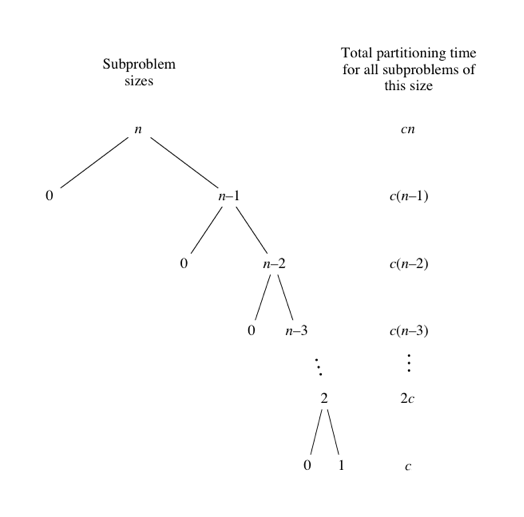

Al analizar el árbol, se observa que la altura del árbol es $n-1$ y el costo de ejecución en el nivel d es $c(n-d)$ por lo que el costo total es $\sum\limits_{i=1}^{n-1} n-1 = \frac{n(n-1)}{2}$.

Para la notación $O$ grande se ignoran las constantes por lo que se obtiene $O(n^2)$.

### Mejor y Caso Promedio: $O(n*log(n))$

El mejor caso ocurre cuando el pivote elegido es la mediana de todos los valores ordenados.

El caso promedio cuando el arreglo está desordenado y sus elementos no están ni en orden ascendente o descendente.

#### Teorema Maestro para el Mejor Caso y Caso Promedio

Utilizando el teorema maestro se puede obtener la complejidad temporal del algoritmo en el mejor caso y el caso promedio:

Se tiene $T(n) \leq aT(n/b)+O(n^d)$ donde $a=2$, $b=2$ y $d=1$.

Ya que $2 = 2^1$, la complejidad temporal es $O(n*log(n))$.

# 4. Correctitud 

## 4.1 Teorema 1 (Correctitud de Partition)

La función **Partition** recibe los índices inicial y final de un arreglo o sub-arreglo, ordena 

## 4.2 Prueba del Teorema 1 por Invariante de Bucle

Al principio de cada iteración del bucle mayor, para cada arreglo a[ini...fin]:

$ini$ = índice del primer elemento

$fin$ = índice del último elemento

$i$ = índice del último elemento del subarreglo izquierdo

$j$ = índice del primer elemento del subarreglo derecho

$piv$ = valor del pivote

$k$ = índice actual


1. Si $ini \leq k \leq i$, entonces $a[k] \leq piv$
2. Si $i \leq k \leq j$, entonces $a[k] > piv$
3. Si $k = fin+1$, entonces $a[k] = piv$

### Inicialización

Antes de la primera iteración del ciclo, $i = j = ini$. Ya que no hay valores entre $ini$ e $i$ y no hay valores entre $i$ y $j$, las primeras 2 condiciones están satisfechas.

### Mantención

Después de la primera iteración, si $a[j] \leq piv$, se intercambian los elementos de las posiciones $a[i]$ y $a[j]$ y luego se incrementa el valor de $i$ en $1$. Luego en todos los casos se incrementa el valor de $j$ en $1$.

Después de hacer esto el sub-arreglo $a[ini..i-1]$ tiene elementos menores o iguales a $piv$, el sub-arreglo $a[i..j]$ tiene elementos mayores a $piv$, el sub-arreglo $a[j+1..fin-1]$ tiene elementos aún por ordenar y el elemento $a[fin] = piv$.

### Terminación

Cuando el bucle termina, el sub-arreglo $a[ini..i-1]$ tiene elementos menores o iguales a $piv$, el sub-arreglo $a[i..j]$ tiene elementos mayores a $piv$, el sub-arreglo $a[j+1..fin-1]$ no tiene elementos y el elemento $a[fin] = piv$.

### Correctitud

Finalmente, como la propiedad de bucle invariante es verdadera al incio del bucle y se mantiene en cada iteración y al final del bucle, podemos decir que al finalizar la n-ésima iteración del algoritmo, se genera un arreglo $[a_1',a_2',...,a_n']$, con los mismos elementos del arreglo de entrada ordenados con los elementos menores al pivote a la izquierda y los mayores a la derecha.

## 4.3 Teorema 2 (Correctitud de QuickSort)

El algoritmo **QuickSort** genera un arreglo $[a_1', a_2', a_3', ... , a_n']$ con los mismos elementos de entrada $[a_1, a_2, a_3, ..., a_n]$, ordenados de menor a mayor, es decir $a_1'\leq a_2' \leq  a_3' \leq... \leq a_n'$.

## 4.4 Prueba del Teorema 2 por medio de Inducción

La hipótesis $T(n)$ se basa en que **QuickSort** retorna un arreglo de $n$ elementos ordenados de menor a mayor.

### Caso base $n = 1$

Si $T(1)$ la función **QuickSort** retorna un sólo elemento el cual estaría siempre ordenado, por lo que se cumpliría la condición.

### Resto de casos

Ahora hay que probar si $T(m)$ es verdadero para $m < n$, entonces lo será también para $T(n)$.

**Partition** dividirá el arreglo de largo $n$ en dos sub-arreglos de largo $mIzq$ y $mDer$ que están a la izquierda y derecha del pivote respectivamente, entonces $mIzq , mDer < n$.

Según lo mencionado antes la función **Partition** es correcta por lo que el sub-arreglo izquierdo tendrá los elementos menores al pivote y el sub-arreglo derecho tendrá los elementos mayores al pivote, por ello se puede asumir que el arreglo será ordenado correctamente.

Por lo tanto la función **QuickSort** es correcta.

# 5. Experimentos

## 5.1. Número de comparaciones

La gráfica de acontinuación muestra una comparación entre:

* la cantidad de comparaciones realizadas en el peor caso calculadas matemáticamente,
* la cantidad de comparaciones realizadas en el mejor caso calculadas matemáticamente
* y la cantidad de comparaciones realizadas en casos de prueba realizados con entradas aleatorias

para problemas con arreglos de entrada de largo $n \in [2,50]$ en los cuales el valor de los elementos es elejido aleatoriamente desde un conjunto de números entre 1 y 100.

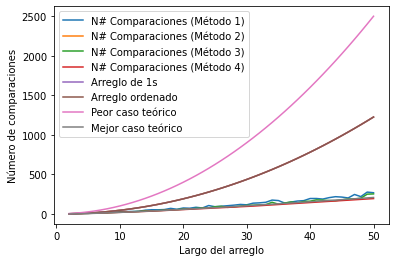

In [138]:
import matplotlib.pyplot as plt
import math
import random

rangeS = 2
rangeF = 51
x=[n for n in range(rangeS,rangeF)]
# Peor Caso
y1=[(n**2) for n in range(rangeS,rangeF)]
# Mejor caso
y2=[( n*math.log2(n) - (n + n/2) ) for n in range(rangeS,rangeF)]
# Muestras Método de Pivote 1
yc1=[];
# Muestras Método de Pivote 2
yc2=[];
# Muestras Método de Pivote 3
yc3=[];
# Muestras Método de Pivote 4
yc4=[];
# Arreglo lleno de 1s
yt1=[];
# Arreglo Ordenado
yt2=[];


for n in range(rangeS,rangeF):
  a = random.sample(range(1, 100), n)
  recursiones = comparaciones = 0
  c = [];
  c, recursiones, comparaciones = quickSort(a, 0, (len(a)-1), 1, recursiones, 0, False)
  yc1.append(comparaciones)
  c, recursiones, comparaciones = quickSort(a, 0, (len(a)-1), 2, recursiones, 0, False)
  yc2.append(comparaciones)
  c, recursiones, comparaciones = quickSort(a, 0, (len(a)-1), 3, recursiones, 0, False)
  yc3.append(comparaciones)
  c, recursiones, comparaciones = quickSort(a, 0, (len(a)-1), 4, recursiones, 0, False)
  yc4.append(comparaciones)
  a = [1 for i in range(len(a))]
  c, recursiones, comparaciones = quickSort(a, 0, (len(a)-1), 4, recursiones, 0, False)
  yt1.append(comparaciones)
  c, recursiones, comparaciones = quickSort(c, 0, (len(a)-1), 4, recursiones, 0, False)
  yt2.append(comparaciones)

plt.plot(x,yc1)
plt.plot(x,yc2)
plt.plot(x,yc3)
plt.plot(x,yc4)
plt.plot(x,yt1)
plt.plot(x,yt2)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["N# Comparaciones (Método 1)", "N# Comparaciones (Método 2)", "N# Comparaciones (Método 3)", "N# Comparaciones (Método 4)", "Arreglo de 1s", "Arreglo ordenado", "Peor caso teórico", "Mejor caso teórico"])

plt.xlabel('Largo del arreglo')
plt.ylabel('Número de comparaciones')
plt.show()

### Analisis del gráfico

Los resultados que muestra el grafico indican que la cantidad de comparaciones varía dependiendo del método para elegir pivote que se utilize, sin embargo en promedio se mantienen siempre muy cercanas al mejor caso incluso para largos de arreglo mayores mientras que el peor caso (cuando el arreglo está ordenado o todos los elementos son iguales) aumenta muchísimo. De esto se puede concluir que el algoritmo **QuickSort** es muy bueno para ordenar independiente del largo del arreglo con un caso promedio muy cercano al mejor pero un peor caso muy notorio.

## 5.2. Tiempo de ejecución experimental

El siguiente gráfico muestra el comportamiento del tiempo de ejecución del algoritmo en relación al tamaño del arreglo de entrada y el método para elegir el pivote, esto utilizando problemas generados aleatoriamente de arreglos de largo $n \in [2,500]$.
Los métodos utilizados son:
1. Elegir el primer elemento del sub-arreglo como pivote.
2. Elegir el último elemento del sub-arreglo como pivote.
3. Elegir 3 índices al azar y utilizar la mediana de estos como pivote.
4. Elegir el elemento del centro del sub-arreglo como pivote.

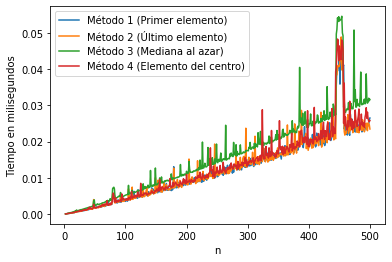

In [119]:
import datetime
import random
from timeit import repeat

x=[];
y1=[];
y2=[];
y3=[];
y4=[];

for n in range(2,501):
  a = random.sample(range(1, 1000), n)

  #la función repeat está ejecutando 20 veces insert_sort con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import quickSort", stmt=f"quickSort({a}, 0, (len({a})-1), 1)", repeat=1, number=10)
  y1.append(t)
  
  t = repeat(setup="from __main__ import quickSort", stmt=f"quickSort({a}, 0, (len({a})-1), 2)", repeat=1, number=10)
  y2.append(t)

  t = repeat(setup="from __main__ import quickSort", stmt=f"quickSort({a}, 0, (len({a})-1), 3)", repeat=1, number=10)
  y3.append(t)

  t = repeat(setup="from __main__ import quickSort", stmt=f"quickSort({a}, 0, (len({a})-1), 4)", repeat=1, number=10)
  y4.append(t)

  x.append(n)


plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.legend(["Método 1 (Primer elemento)","Método 2 (Último elemento)","Método 3 (Mediana al azar)","Método 4 (Elemento del centro)"])

plt.xlabel('n')
plt.ylabel('Tiempo en milisegundos')
plt.show()

### Análisis del gráfico

Del gráfico se puede observar que la implementación realizada para el Método 3 es la más lenta y con diferencia, mientras el resto de Métodos se mantienen en el mismo rango. Si bien el Método 3 resultó ser el más lento, esto podría ser por la forma en la que se implementó y no por ser intrinsecamente más lento, y aún siendo más lento, se puede observar que es más estable que el resto de métodos.
Nótese que el pico que se encuentra entre $n 400$ y $n 500$ muy posiblemente se debe al hardware y el sistema ya que este sucede con todos los métodos.

# 5.3. Comparación de tiempo de ejecución con MergeSort

El siguiente gráfico muestra una comparación entre los tiempos de ejecución de los algoritmos **QuickSort** y **MergeSort**.


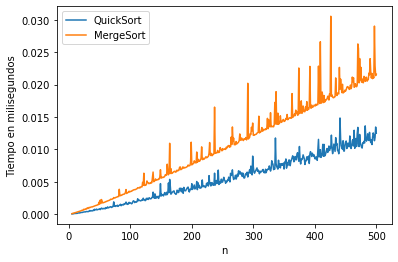

In [116]:
import datetime
import random
from timeit import repeat

# Código para MergeSort
def merge_sort(a):
    b = []
    c = []
    if len(a) == 1:
        return a
    x = (int)((len(a))/2)
    b = merge_sort(a[0:x])
    c = merge_sort(a[x:len(a)])
    a = merge(b, c)
    return a

# Merge Code
def merge(a, b):
    i = j = 0
    c = []
    while i < len(a) and j < len(b):
        if a[i] <= b[j]:
            c.append(a[i])
            i+=1
        else:
            c.append(b[j])
            j+=1
    while i < len(a):
        c.append(a[i])
        i+=1

    while j < len(b):
        c.append(b[j])
        j+=1
    return c
# Fin del código de MergeSort

# Código Simplificado para QuickSort
def quickSortSimple(a, ini, fin):
    if fin <= ini:
        return a
    mid = partitionSimple(a, ini, fin)
    b = quickSortSimple(a, ini, mid)
    c = quickSortSimple(a, mid+2, fin)
    return a
# Función Partition
def partitionSimple(a, ini, fin):
    pivote = int((fin+ini+1)/2)
    a[pivote], a[fin] = a[fin], a[pivote]
    i = ini
    for j in range((ini),(fin)):
        if a[j] <= a[fin]:
            a[i], a[j] = a[j], a[i]
            i+=1
    a[i], a[fin] = a[fin], a[i]
    return i-1
# Fin código de QuickSort simplificado

x=[];
y1=[];
y2=[];

for n in range(5,501):
  a = random.sample(range(1, 1000), n)
  x.append(n)

  t = repeat(setup="from __main__ import quickSortSimple", stmt=f"quickSortSimple({a}, 0, (len({a})-1))", repeat=1, number=10)
  y1.append(t)
  t = repeat(setup="from __main__ import merge_sort", stmt=f"merge_sort({a})", repeat=1, number=10)
  y2.append(t)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["QuickSort", "MergeSort"])

plt.xlabel('n')
plt.ylabel('Tiempo en milisegundos')
plt.show()

### Analisis del gráfico

En el gráfico se puede apreciar que el algoritmo **QuickSort** tiene un menor tiempo de ejecución en comparación a **MergeSort**, especialmente con tamaños de arreglo más grande donde la diferencia aumenta linealmente, gracias a esto se puede confirmar que el algoritmo **QuickSort** es mejor para ordenar arreglos rápidamente el los casos promedios.